In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.describe(include="object")

,Gender
count,200
unique,2
top,Female
freq,112


In [7]:
label=LabelEncoder()

In [8]:
data.Gender=label.fit_transform(data.Gender)

In [9]:
data[['Gender']].head()

,Gender
0,1
1,1
2,0
3,0
4,0


In [10]:
standard=StandardScaler()

In [11]:
print(data.isnull().sum())  


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [12]:
data_new=data.copy()

In [13]:
data_new[['Age' ,"Annual Income (k$)" , "Spending Score (1-100)"]]=standard.fit_transform(data_new[['Age' ,"Annual Income (k$)" , "Spending Score (1-100)"]])

In [14]:
data_new.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,-1.424569,-1.738999,-0.434801
1,2,1,-1.281035,-1.738999,1.195704
2,3,0,-1.352802,-1.700830,-1.715913
3,4,0,-1.137502,-1.700830,1.040418
4,5,0,-0.563369,-1.662660,-0.395980


In [15]:
j = []
clusteren = []

In [16]:
for i in range(2, 12):
    model = KMeans(n_clusters=i)
    model.fit(data_new)
    j.append(model.inertia_)
    clusteren.append(i)


C:\Users\amina\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amina\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amina\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amina\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'Error')

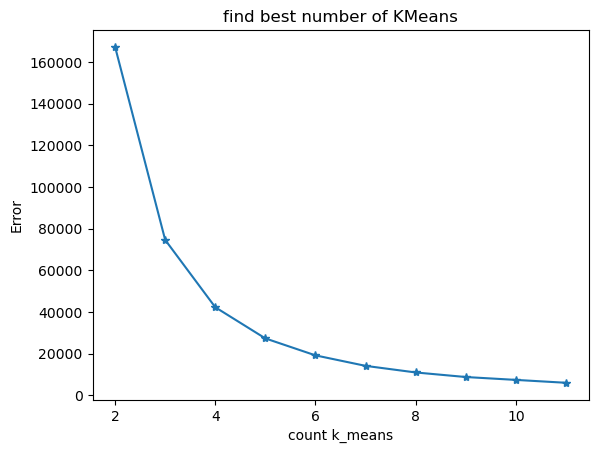

In [17]:
plt.plot(clusteren ,j, marker='*')
plt.title("find best number of KMeans")
plt.xlabel("count k_means")
plt.ylabel("Error")

In [18]:
model=KMeans(n_clusters=4)

In [19]:
model.fit(data)

C:\Users\amina\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [20]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"


In [21]:
!pip install --upgrade scikit-learn threadpoolctl

In [22]:
predict = model.predict(data)

In [23]:
data['predicted_label']=predict

In [24]:
data['predicted_label'].unique()

array([0, 2, 1, 3])

In [25]:
df0 = data[data['predicted_label'] == 0]  
df1 = data[data['predicted_label'] == 1]  
df2 = data[data['predicted_label'] == 2]  
df3 = data[data['predicted_label'] == 3]  

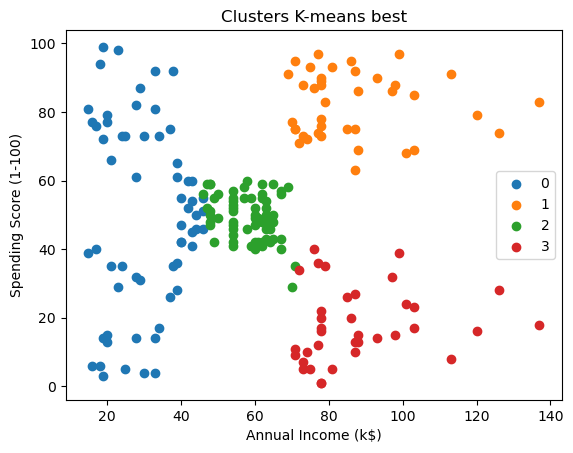

In [26]:
plt.scatter(df0['Annual Income (k$)'],df0['Spending Score (1-100)'], label=0 )
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'] , label=1)
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'] , label=2)
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'] , label=3)
plt.title("Clusters K-means best")
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

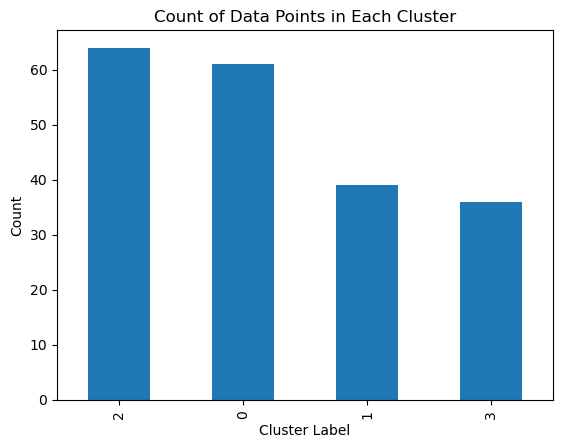

In [27]:
data['predicted_label'].value_counts().plot(kind='bar')
plt.title("Count of Data Points in Each Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Count")
plt.show()

<AxesSubplot:ylabel='predicted_label'>

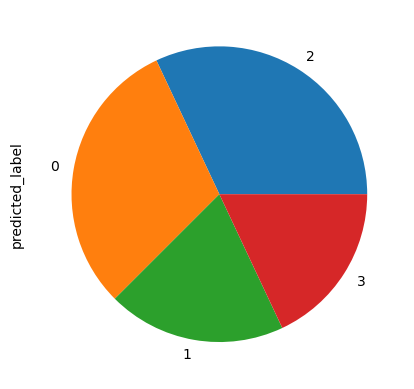

In [28]:
data['predicted_label'].value_counts().plot(kind='pie')

<AxesSubplot:xlabel='predicted_label', ylabel='Spending Score (1-100)'>

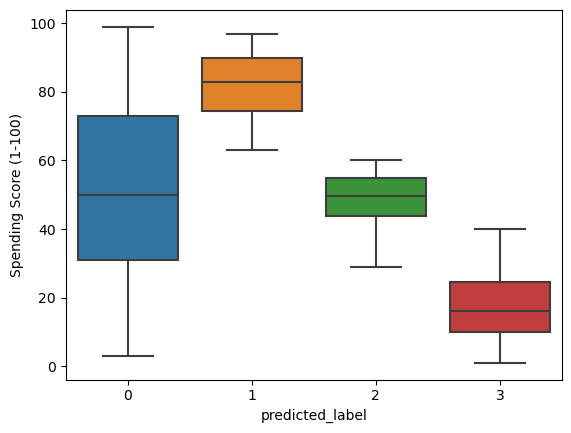

In [29]:
sns.boxplot(x='predicted_label', y='Spending Score (1-100)', data=data)

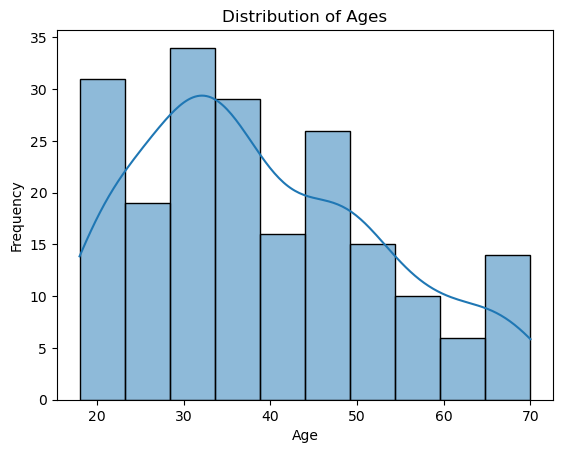

In [30]:
sns.histplot(data['Age'],bins=10, kde=True)  
plt.title("Distribution of Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

<AxesSubplot:xlabel='predicted_label', ylabel='count'>

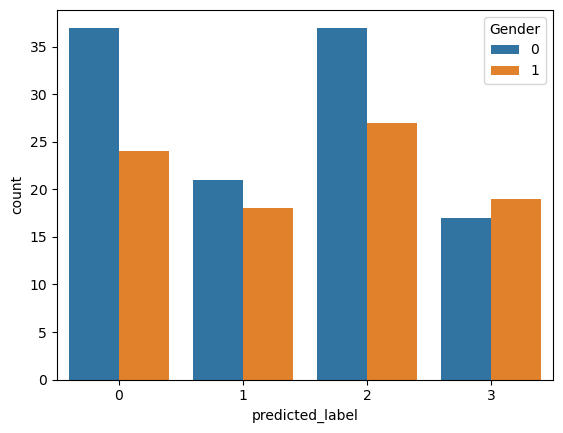

In [31]:
sns.countplot(x='predicted_label', hue='Gender', data=data)

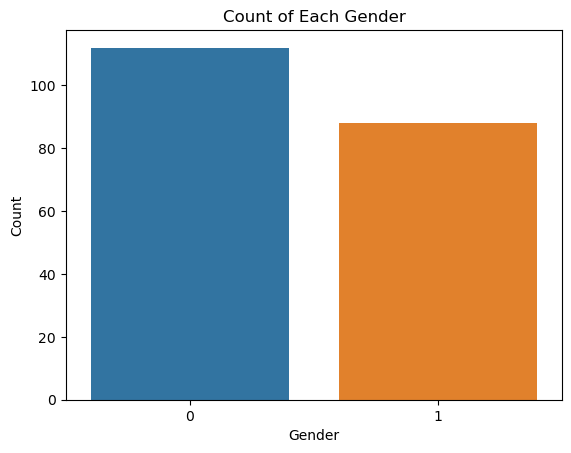

In [32]:
sns.countplot(data=data, x='Gender')
plt.title("Count of Each Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

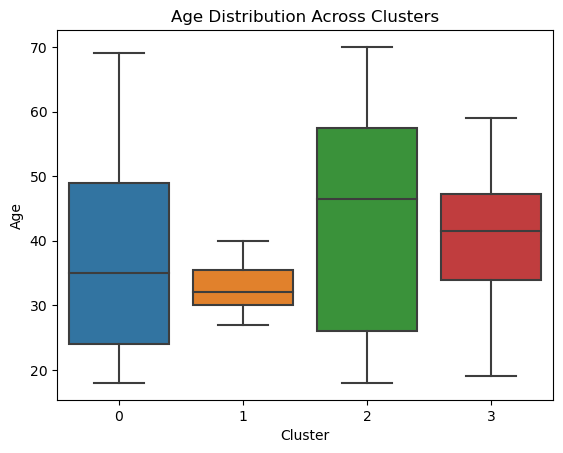

In [33]:
sns.boxplot(x='predicted_label', y='Age', data=data)
plt.title("Age Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.show()


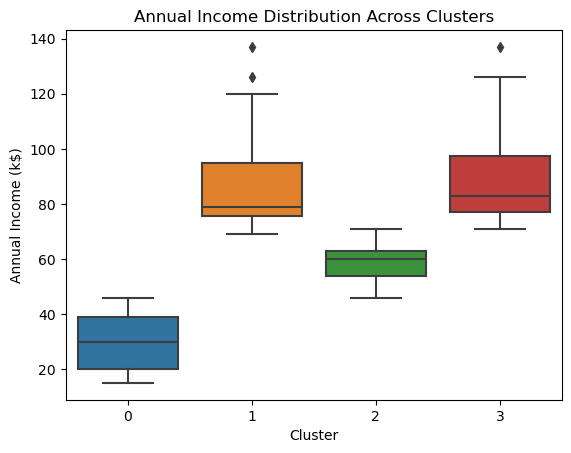

In [34]:
sns.boxplot(x='predicted_label', y='Annual Income (k$)', data=data)
plt.title("Annual Income Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Annual Income (k$)")
plt.show()


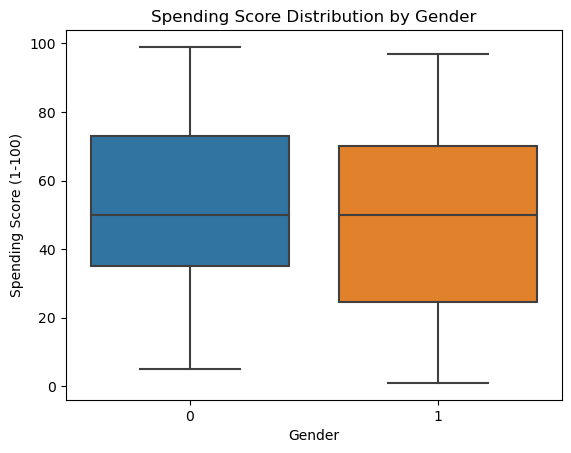

In [35]:
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data)
plt.title("Spending Score Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Spending Score (1-100)")
plt.show()
